#**1. Input Data**

* the data directory ('movie_review') consists of two sub-directories ('pos') and ('neg') for positive and negative, respectively
* each sub-directory includes a list of files for review texts
* the preprocessing given by the below codes transforms each text into the frequency information

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('wordnet')
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

review_data = load_files(r"/content/drive/My Drive/colab/movie_review")
X, y = review_data.data, review_data.target

documents = []

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

vectorizer = CountVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
import numpy as np

In [ ]:
def normalize(data_list):

  new_data_list = []

  normalized_data=0

  for data in data_list:
    normalized_data = (data - min(data)) / (max(data) - min(data))
    new_data_list.append(normalized_data)

  result = np.array(new_data_list)

  return(result)

In [ ]:
def standerdaze(data_list):

  new_data_list = []

  standerdazed_data=0

  for data in data_list:
    standerdazed_data = (data - np.mean(data)) / np.std(data)
    new_data_list.append(standerdazed_data)

  result = np.array(new_data_list)

  return(result)

In [ ]:
X_train = np.array(X_train) # 1400 x 1500. inputs x

X_test = np.array(X_test) # 600 x 1500. inputs x

In [ ]:
training_num = len(X_train) # 1400
testing_num = len(X_test)   # 600

In [ ]:
normalized_X_train = normalize(X_train)
normalized_X_test = normalize(X_test)

In [ ]:
standerdazed_X_train = standerdaze(normalized_X_train)
standerdazed_X_test = standerdaze(normalized_X_test)

In [ ]:
mu,sigma = 0.0,1.0

def sigmoid(x):
    return 1 / (1 +np.exp(-x))

class Layer:
  def __init__(self,n_neurons,n_inputs,n):
    np.random.seed(n)
    self.weights = np.random.normal(mu,sigma,(n_neurons ,n_inputs))
    self.biases = np.zeros(n_neurons)
  def forward(self,inputs, weights):
    self.output = sigmoid(np.dot(weights,inputs) + self.biases)  
    return self.output

x = inputs ( T_list_training_image )

y = layer1_output

z = layer2_output

h = layer3_output

In [ ]:
a=2000 # 1_input
b=400  # 2_input
c=100  # 3_input
d=10  # 4_input

In [ ]:
layer1 = Layer(b,a,1) # neuron , inputs
layer2 = Layer(c,b,2)
layer3 = Layer(d,c,3)
layer4 = Layer(1,d,4)

In [ ]:
u = layer1.weights # b x a

v = layer2.weights # c x b

w = layer3.weights # d x c

t = layer4.weights # 1 x d

In [ ]:
def get_theta_arr(u,v,w,t):
  theta_arr=[]
  
  for i in range(b):
    for j in range(a):
      theta_arr.append(u[i][j])
  
  for i in range(c):
    for j in range(b):
      theta_arr.append(v[i][j])

  for i in range(d):
    for j in range(c):
      theta_arr.append(w[i][j])

  for i in range(1):
    for j in range(d):
      theta_arr.append(t[i][j])

  temp = np.array(theta_arr)

  theta_arr = temp
  
  return theta_arr

In [ ]:
def get_arr(m):
  arr = [0 for i in range(m)]
  return arr 

training

In [ ]:
learning_rate = 0.00001
my_lambda = 0.00000001
epoch= 23

In [ ]:
training_arr_OF = get_arr(epoch)
training_accuracy_rate_arr = get_arr(epoch)
testing_arr_OF = get_arr(epoch)
testing_accuracy_rate_arr = get_arr(epoch)
y_pred_train = get_arr(len(y_train))
y_pred_test = get_arr(len(y_test))
theta_arr=get_arr(a*b + b*c + c*d + d*1)

In [ ]:
cnt=0

num=0

y_pred=0

for e in range(epoch):

  training_OF = 0

  training_accuracy_count=0

  testing_OF = 0

  testing_accuracy_count=0

  for i in range(training_num):

    theta_arr = get_theta_arr(u, v, w, t)

    # theta_arr=get_arr(a*b + b*c + c*d + d*1)
    # num=0

    # for i in range(b):
    #   for j in range(a):
    #     theta_arr[num]=(u[i][j])
    #     num = num + 1
    
    # for i in range(c):
    #   for j in range(b):
    #     theta_arr[num]=(v[i][j])
    #     num = num + 1

    # for i in range(d):
    #   for j in range(c):
    #     theta_arr[num]=(w[i][j])
    #     num = num + 1

    # for i in range(1):
    #   for j in range(d):
    #     theta_arr[num]=(t[i][j])
    #     num = num + 1

    # temp = np.array(theta_arr)

    # theta_arr = temp

    n = len(theta_arr)

    x = standerdazed_X_train[i] # 1500 x 1

    y = layer1.forward(x,u) # 400 x 1

    z = layer2.forward(y,v)  # 100 x 1

    q = layer3.forward(z,w)  # 20 x 1

    h = layer4.forward(q,t)  # 1 x 1

    if h>=0.5:
      y_pred = 1
    else:
      y_pred = 0

    if e == epoch-1:
      y_pred_train[i]=y_pred
    
    training_true_label = y_train[i]

    if training_true_label == y_pred:
      training_accuracy_count = training_accuracy_count + 1

    training_OF = training_OF+ (np.sum(np.dot(-training_true_label, np.log(h))
    - (np.dot((1-training_true_label),np.log(1-h))))/training_num 
    + my_lambda/(2*n)*np.sum(theta_arr**2))

    t_q = q.reshape(1,10)

    part1 = np.dot(h-training_true_label,t_q) # 1 x d

    t = t - learning_rate * (part1 + my_lambda * t / n)
    # w = w - learning_rate * part1
    # d x 1

    t_z = z.reshape(1,100)

    t_t = np.array(t).T # d x 1

    t_q = q.reshape(10,1)

    t_part1 = part1.reshape(1,10)

    part2 = np.dot(np.dot(t_t,t_part1), np.dot((1 - t_q),t_z )) # d x c

    w = w - learning_rate * (part2 + my_lambda * w / n)
    # v = v - learning_rate * part2
    # v -= learning_rate * label_filter * (1 - h) * z * w * (1 - z) * y
    # c x d

    t_y = y.reshape(1,400)

    t_w = np.array(w).T # b x c

    t_1_z = (1-z).reshape(100,1)

    part3 = np.dot(np.dot(t_w,part2),np.dot(t_1_z,t_y)) # b x c

    v = v - learning_rate * (part3 + my_lambda * v / n)
    # u = u - learning_rate * (part4 + my_lambda * u / n)
    # u = u - learning_rate * part4
    # b x c

    t_x = x.reshape(1,2000)

    t_v = np.array(v).T # c x b

    t_1_y = (1-y).reshape(400,1)

    part4 = np.dot(np.dot(t_v,part3),np.dot(t_1_y,t_x)) # a x b

    u = u - learning_rate * (part4 + my_lambda * u / n)
    # a x b

  for i in range(testing_num):

    x = standerdazed_X_test[i] # 1500 x 1

    y = layer1.forward(x,u) # 400 x 1

    z = layer2.forward(y,v)  # 100 x 1

    q = layer3.forward(z,w)  # 20 x 1

    h = layer4.forward(q,t)  # 1 x 1

    if h>=0.5:
      y_pred = 1
    else:
      y_pred = 0

    if e == epoch-1:
      y_pred_test[i]=y_pred
    
    testing_true_label = y_test[i]

    if testing_true_label == y_pred:
      testing_accuracy_count = testing_accuracy_count + 1

    testing_OF = testing_OF+ (np.sum(np.dot(-testing_true_label, np.log(h))
    - (np.dot((1-testing_true_label),np.log(1-h))))/testing_num 
    + my_lambda/(2*n)*np.sum(theta_arr**2))

  training_accuracy_rate_arr[cnt]=(training_accuracy_count/(training_num)*100)
  training_arr_OF[cnt] = training_OF

  testing_accuracy_rate_arr[cnt]=(testing_accuracy_count/(testing_num)*100)
  testing_arr_OF[cnt] = (testing_OF)

  print(training_arr_OF[cnt])
  print(training_accuracy_rate_arr[cnt])
  print(testing_arr_OF[cnt])
  print(testing_accuracy_rate_arr[cnt])
  print()

  cnt = cnt+1

test

Training loss curve

In [ ]:
del testing_arr_OF[-1]
del training_arr_OF[-1]

In [ ]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

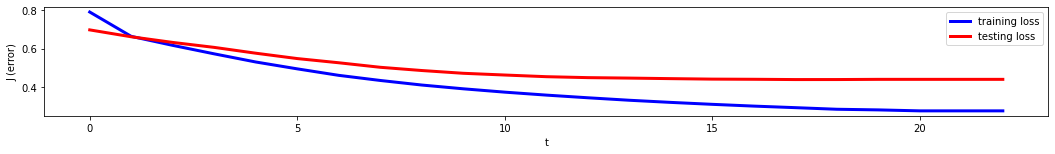

In [ ]:
fig = plt.figure()
plt.figure(figsize=(18, 2))

OF_training_loss_curve=np.array(training_arr_OF,dtype=float)
OF_testing_loss_curve=np.array(testing_arr_OF,dtype=float)

t1=np.arange(0,len(training_arr_OF),step=1)
t2=np.arange(0,len(testing_arr_OF),step=1)

plt.xlabel('t')
plt.ylabel('J (error)')

plt.plot(t1,OF_training_loss_curve,color="blue",label="training loss",linewidth = 3)
plt.plot(t2,OF_testing_loss_curve,color="red",label="testing loss",linewidth = 3)

plt.legend()
plt.show()

accuracy curve

In [2]:
training_accuracy_curve=np.array(training_accuracy_rate_arr,dtype=float)
testing_accuracy_curve=np.array(testing_accuracy_rate_arr,dtype=float)

t1=np.arange(0,len(testing_arr_OF),step=1)
t2=np.arange(0,len(testing_arr_OF),step=1)

plt.xlabel('t')
plt.ylabel('accuracy curve')

plt.plot(t1,training_accuracy_curve,color="blue",label="training accuracy",linewidth = 3)
plt.plot(t2,testing_accuracy_curve,color="red",label="testing accuracy",linewidth = 3)

plt.legend()
plt.show()

NameError: ignored

# **Result**
# **1. Plot the loss curve**

<Figure size 432x288 with 0 Axes>

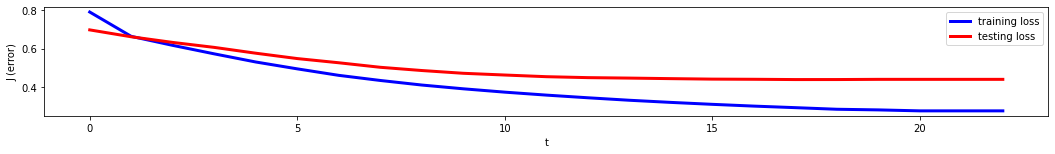

In [ ]:
fig = plt.figure()
plt.figure(figsize=(18, 2))

plt.xlabel('t')
plt.ylabel('J (error)')

plt.plot(t1,OF_training_loss_curve,color="blue",label="training loss",linewidth = 3)
plt.plot(t2,OF_testing_loss_curve,color="red",label="testing loss",linewidth = 3)

plt.legend()
plt.show()

# **2. Plot the accuracy curve**

In [4]:
training_accuracy_curve=np.array(training_accuracy_rate_arr,dtype=float)
testing_accuracy_curve=np.array(testing_accuracy_rate_arr,dtype=float)

t1=np.arange(0,len(testing_arr_OF),step=1)
t2=np.arange(0,len(testing_arr_OF),step=1)

plt.xlabel('t')
plt.ylabel('accuracy curve')

plt.plot(t1,training_accuracy_curve,color="blue",label="training accuracy",linewidth = 3)
plt.plot(t2,testing_accuracy_curve,color="red",label="testing accuracy",linewidth = 3)

plt.legend()
plt.show()

NameError: ignored

# **3. Plot the quantitative results**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_train,y_pred_train))
print(classification_report(y_train,y_pred_train))
print(accuracy_score(y_train, y_pred_train))

print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))
print(accuracy_score(y_test, y_pred_test))

[[778  64]
 [ 46 812]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       842
           1       0.93      0.95      0.94       858

    accuracy                           0.94      1700
   macro avg       0.94      0.94      0.94      1700
weighted avg       0.94      0.94      0.94      1700

0.9352941176470588
[[158   0]
 [ 52  90]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       158
           1       1.00      0.63      0.78       142

    accuracy                           0.83       300
   macro avg       0.88      0.82      0.82       300
weighted avg       0.87      0.83      0.82       300

0.8266666666666667


# 4. Testing accuracy

In [ ]:
print("testing accuracy : ",testing_accuracy_rate_arr[-1],"%")

testing accuracy :  82.66666666666667 %
